In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

%matplotlib inline
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]


P_conc = ((1/6.02e23)/(14.71401*11.11790*10.13598))*1e24 # mol/L

r0_idx = 0
rc_idx = 0

def calc_Kd(r,PMF,r0,rc):
    kB = 0.008314463 # kJ/(mol*K)
    T = 300 # K
    
    global r0_idx
    r0_idx = np.where(r >= r0)[0][0]
    global rc_idx
    rc_idx = np.where(r <= rc)[0][-1]

    x_rc = r[r0_idx:rc_idx]
    x_adot = r[rc_idx-1:]
    y_rc = np.exp(-1*PMF[r0_idx:rc_idx]/(kB*T))
    y_adot = np.exp(-1*PMF[rc_idx-1:]/(kB*T))
    
    ddG = kB*T*np.log(integrate.trapz(y=y_adot, x=x_adot)/integrate.trapz(y=y_rc, x=x_rc))  + kB*T*np.log(P_conc)
    
    Kd = np.exp(ddG/(kB*T))*1e6
    
    return Kd 


1.85 ['1.783e+03', '4.766e+02', '3.641e+01', '6.479e-01']


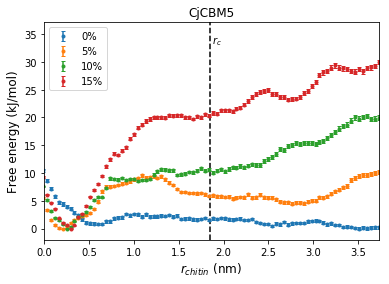

In [136]:
cbm5_1p0 = np.loadtxt('cbm5-US-1.0.dat')
cbm5_1p05 = np.loadtxt('cbm5-US-1.05.dat')
cbm5_1p10 = np.loadtxt('cbm5-US-1.10.dat')
cbm5_1p15 = np.loadtxt('cbm5-US-1.15.dat')

r0 = 0.65
rc = 2.5
Kd_cbm5 = np.array([calc_Kd(cbm5_1p0[:,0],cbm5_1p0[:,1],r0,rc), calc_Kd(cbm5_1p05[:,0],cbm5_1p05[:,1],r0,rc), calc_Kd(cbm5_1p10[:,0],cbm5_1p10[:,1],r0,rc), calc_Kd(cbm5_1p15[:,0],cbm5_1p15[:,1],r0,rc)])

xmin = 0
xmax = cbm5_1p0[:,0][-1]-r0
new_rc = rc - r0

print(new_rc, ['{:.3e}'.format(x) for x in Kd_cbm5])

plt.errorbar(cbm5_1p0[:,0]-r0,cbm5_1p0[:,1],cbm5_1p0[:,2],fmt='.',capsize=2,label='0%')
plt.errorbar(cbm5_1p05[:,0]-r0,cbm5_1p05[:,1],cbm5_1p05[:,2],fmt='.',capsize=2,label='5%')
plt.errorbar(cbm5_1p10[:,0]-r0,cbm5_1p10[:,1],cbm5_1p10[:,2],fmt='.',capsize=2,label='10%')
plt.errorbar(cbm5_1p15[:,0]-r0,cbm5_1p15[:,1],cbm5_1p15[:,2],fmt='.',capsize=2,label='15%')
ymin,ymax = plt.gca().get_ylim()
plt.vlines(new_rc,ymin,ymax,'k',linestyles='dashed')
plt.text(new_rc+0.02,0.9*ymax,'$r_c$',fontsize=10)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.legend()
plt.xlabel(r'$r_{chitin}$ (nm)', fontsize=12)
plt.ylabel(r'Free energy (kJ/mol)', fontsize=12)
plt.title('CjCBM5')
plt.savefig('US-CBM5.png', dpi=300)
plt.show()





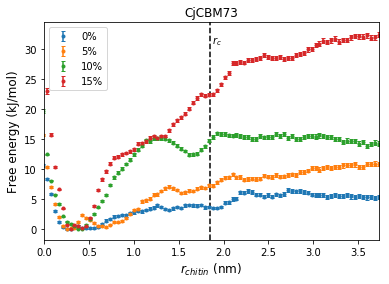

1.85 ['2.867e+02', '7.581e+01', '1.450e+01', '1.333e-01']


In [137]:
cbm73_1p0 = np.loadtxt('cbm73-US-1.0.dat')
cbm73_1p05 = np.loadtxt('cbm73-US-1.05.dat')
cbm73_1p10 = np.loadtxt('cbm73-US-1.10.dat')
cbm73_1p15 = np.loadtxt('cbm73-US-1.15.dat')

plt.errorbar(cbm73_1p0[:,0]-r0,cbm73_1p0[:,1],cbm73_1p0[:,2],fmt='.',capsize=2,label='0%')
plt.errorbar(cbm73_1p05[:,0]-r0,cbm73_1p05[:,1],cbm73_1p05[:,2],fmt='.',capsize=2,label='5%')
plt.errorbar(cbm73_1p10[:,0]-r0,cbm73_1p10[:,1],cbm73_1p10[:,2],fmt='.',capsize=2,label='10%')
plt.errorbar(cbm73_1p15[:,0]-r0,cbm73_1p15[:,1],cbm73_1p15[:,2],fmt='.',capsize=2,label='15%')

ymin,ymax = plt.gca().get_ylim()
plt.vlines(new_rc,ymin,ymax,'k',linestyles='dashed')
plt.text(new_rc+0.02,0.9*ymax,'$r_c$',fontsize=10)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.legend()
plt.xlabel(r'$r_{chitin}$ (nm)', fontsize=12)
plt.ylabel(r'Free energy (kJ/mol)', fontsize=12)
plt.title('CjCBM73')
plt.savefig('US-CBM73.png', dpi=300)
plt.show()


Kd_cbm73 = np.array([calc_Kd(cbm73_1p0[:,0],cbm73_1p0[:,1],r0,rc), calc_Kd(cbm73_1p05[:,0],cbm73_1p05[:,1],r0,rc), calc_Kd(cbm73_1p10[:,0],cbm73_1p10[:,1],r0,rc), calc_Kd(cbm73_1p15[:,0],cbm73_1p15[:,1],r0,rc)])
print(new_rc, ['{:.3e}'.format(x) for x in Kd_cbm73])


[P]=(1/Avogadro’s number)/Vbox=(1/6.02x10^23 mol)/(10nm^3)≈0.00166 mol/L≈1.7mM